## KNN And PCA

1. What is K-Nearest Neighbors (KNN) and how does it work in both classification and regression problems?  

->

K-Nearest Neighbors (KNN) is a **supervised learning algorithm** used for both classification and regression tasks.  
It is a **non-parametric** and **instance-based** method, meaning it does not make assumptions about the data distribution and relies on the entire dataset for prediction.  

- **In Classification:**  
  For a new data point, KNN calculates the distance (commonly Euclidean) between it and all training samples. It then identifies the **K nearest neighbors** and assigns the class that is most frequent among them (majority voting).  

- **In Regression:**  
  Instead of voting, KNN takes the **average (mean)** or **median** of the target values of the K nearest neighbors to predict the output.  

Thus, the algorithm’s performance highly depends on choosing an appropriate value of **K** and **distance metric**.  


2. What is the Curse of Dimensionality and how does it affect KNN performance?  

->

The **Curse of Dimensionality** refers to the phenomenon where the performance of algorithms like KNN deteriorates as the number of features (dimensions) increases.  
In high-dimensional spaces, **data points become sparse**, and **distances between points become less meaningful**, making it hard to identify true neighbors.  

Effects on KNN:  
- **Increased computational cost:** Distance calculations become expensive with more dimensions.  
- **Reduced accuracy:** All points tend to appear equally distant, leading to poor classification boundaries.  
- **Overfitting risk:** KNN may fit noise instead of meaningful patterns when irrelevant features are included.  

To mitigate this, **dimensionality reduction techniques like PCA** or **feature selection** are used before applying KNN.  


3. What is Principal Component Analysis (PCA)? How is it different from feature selection?  

->

**Principal Component Analysis (PCA)** is an **unsupervised dimensionality reduction** technique that transforms correlated features into a smaller number of **uncorrelated components (principal components)** while retaining most of the variance in the data.  
It works by finding directions (components) that maximize the variance of data and projecting the original features onto these new axes.  

**Difference from Feature Selection:**  
- **PCA:** Creates *new* features (linear combinations of existing ones) that capture maximum information.  
- **Feature Selection:** Selects the *most important original features* without altering them.  

In short, PCA transforms features, while feature selection filters them.  


4. What are eigenvalues and eigenvectors in PCA, and why are they important?  

->

In PCA, **eigenvalues** and **eigenvectors** come from the **covariance matrix** of the dataset:  

- **Eigenvectors** represent the **directions (principal components)** in which the data varies the most.  
- **Eigenvalues** measure the **amount of variance** captured by each corresponding eigenvector.  

Their importance:  
- Eigenvectors define the **new feature axes** after transformation.  
- Eigenvalues tell how much **information (variance)** each principal component holds.  
By sorting eigenvalues in descending order, we can select the top components that retain most of the variance while reducing dimensionality.  


5. How do KNN and PCA complement each other when applied in a single pipeline?  

->

KNN and PCA complement each other effectively in a single machine learning pipeline:  

- **PCA helps KNN** by reducing dimensionality, noise, and redundant information, thus minimizing the curse of dimensionality.  
- **KNN benefits from PCA** because distances (core to KNN) become more meaningful in the lower-dimensional space.  
- The combination enhances **model speed, interpretability, and generalization**.  

Typical workflow:  
1. Scale the data.  
2. Apply PCA to reduce features while keeping maximum variance.  
3. Train and test KNN on the transformed data.  

This PCA–KNN pipeline is especially useful in high-dimensional datasets like **image recognition or gene expression**, where raw features are too many for direct KNN usage.  

**Dataset Used**: Use the Wine Dataset from sklearn.datasets.load_wine().

KNN accuracy without scaling: 0.7778
KNN accuracy with scaling:    0.9333


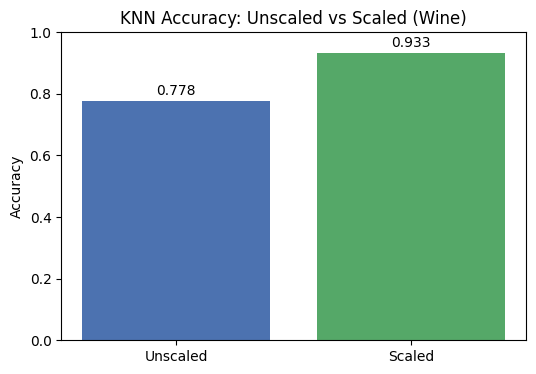

In [1]:
"""
6) Train a KNN Classifier on the Wine dataset with and without feature scaling. Compare model accuracy in both cases.

->
"""
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, knn_unscaled.predict(X_test))

# With scaling
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_s))

print(f"KNN accuracy without scaling: {acc_unscaled:.4f}")
print(f"KNN accuracy with scaling:    {acc_scaled:.4f}")

# Bar plot
plt.figure(figsize=(6,4))
plt.bar(['Unscaled','Scaled'], [acc_unscaled, acc_scaled], color=['#4c72b0','#55a868'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('KNN Accuracy: Unscaled vs Scaled (Wine)')
for i,v in enumerate([acc_unscaled, acc_scaled]):
    plt.text(i, v+0.02, f"{v:.3f}", ha='center')
plt.show()

PC1: explained variance ratio = 0.3620
PC2: explained variance ratio = 0.1921
PC3: explained variance ratio = 0.1112
PC4: explained variance ratio = 0.0707
PC5: explained variance ratio = 0.0656
PC6: explained variance ratio = 0.0494
PC7: explained variance ratio = 0.0424
PC8: explained variance ratio = 0.0268
PC9: explained variance ratio = 0.0222
PC10: explained variance ratio = 0.0193
PC11: explained variance ratio = 0.0174
PC12: explained variance ratio = 0.0130
PC13: explained variance ratio = 0.0080

Cumulative explained variance: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


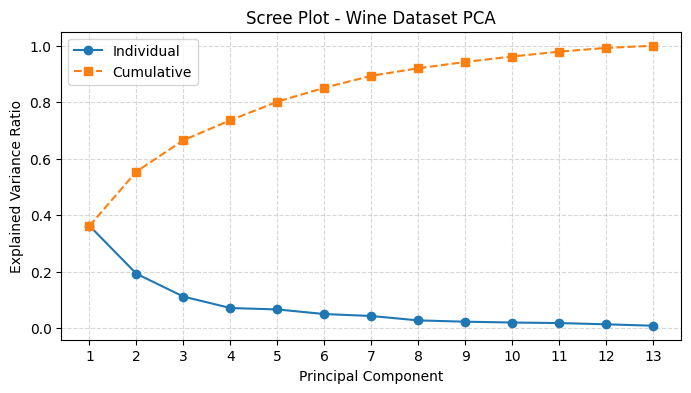

In [2]:
"""
7) Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component.
Also produces a scree plot.

->
"""
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

data = load_wine()
X = data.data

# Scale then PCA
scaler = StandardScaler().fit(X)
X_s = scaler.transform(X)

pca = PCA().fit(X_s)
explained = pca.explained_variance_ratio_

# Print explained variance ratio
for i, ratio in enumerate(explained, start=1):
    print(f"PC{i}: explained variance ratio = {ratio:.4f}")
print("\nCumulative explained variance:", np.cumsum(explained))

# Scree plot
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(explained)+1), explained, 'o-', label='Individual')
plt.plot(np.arange(1, len(explained)+1), np.cumsum(explained), 's--', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Wine Dataset PCA')
plt.xticks(np.arange(1, len(explained)+1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

KNN accuracy (scaled, original features): 0.9333
KNN accuracy (scaled, PCA top-2):         0.9333


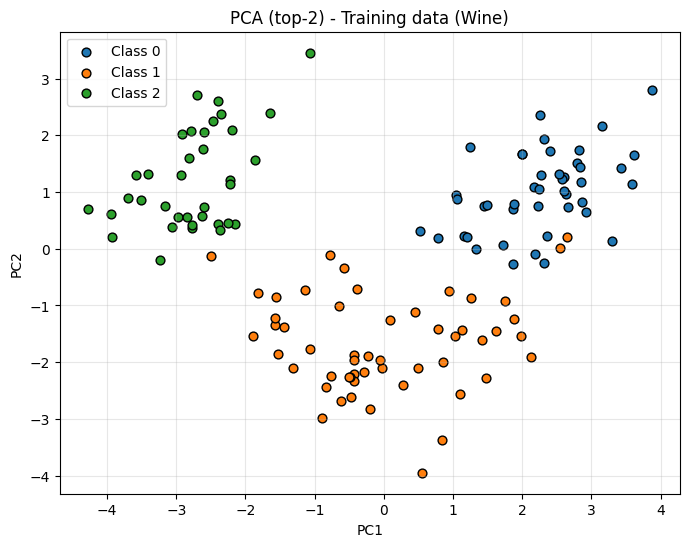

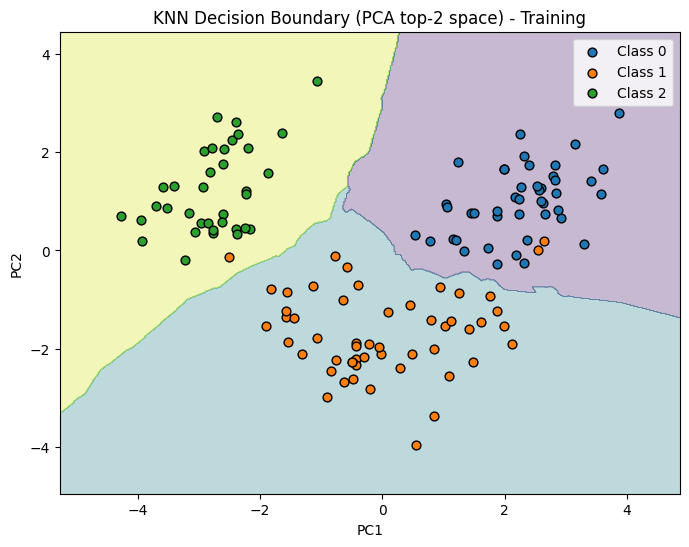

In [3]:
"""
8) Train a KNN Classifier on the PCA-transformed dataset (retain top 2 components). Compare the accuracy with the original dataset.
Also produce a PCA scatter (biplot-like) and decision boundary on the 2D PCA space.

->
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# KNN on full scaled features
knn_full = KNeighborsClassifier(n_neighbors=5).fit(X_train_s, y_train)
acc_full = accuracy_score(y_test, knn_full.predict(X_test_s))

# PCA top-2
pca2 = PCA(n_components=2).fit(X_train_s)
X_train_p2 = pca2.transform(X_train_s)
X_test_p2 = pca2.transform(X_test_s)

knn_pca2 = KNeighborsClassifier(n_neighbors=5).fit(X_train_p2, y_train)
acc_pca2 = accuracy_score(y_test, knn_pca2.predict(X_test_p2))

print(f"KNN accuracy (scaled, original features): {acc_full:.4f}")
print(f"KNN accuracy (scaled, PCA top-2):         {acc_pca2:.4f}")

# PCA scatter (colored by class)
plt.figure(figsize=(8,6))
for cls in np.unique(y_train):
    idx = np.where(y_train==cls)
    plt.scatter(X_train_p2[idx,0], X_train_p2[idx,1], label=f"Class {cls}", s=40, edgecolor='k')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (top-2) - Training data (Wine)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Decision boundary on PCA 2D
h = 0.02
x_min, x_max = X_train_p2[:,0].min()-1, X_train_p2[:,0].max()+1
y_min, y_max = X_train_p2[:,1].min()-1, X_train_p2[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_pca2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
for cls in np.unique(y_train):
    idx = np.where(y_train==cls)
    plt.scatter(X_train_p2[idx,0], X_train_p2[idx,1], label=f"Class {cls}", s=40, edgecolor='k')
plt.title('KNN Decision Boundary (PCA top-2 space) - Training')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend()
plt.show()

KNN (Euclidean) accuracy: 0.9333
KNN (Manhattan) accuracy: 0.9778


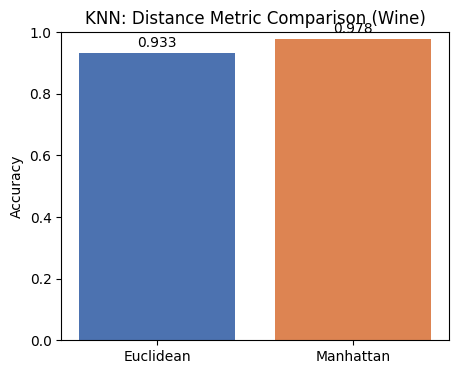

In [4]:
"""
9) Train a KNN Classifier with different distance metrics (euclidean, manhattan) on the scaled Wine dataset and compare the results.

->
"""
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Euclidean (p=2)
knn_euc = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2).fit(X_train_s, y_train)
acc_euc = accuracy_score(y_test, knn_euc.predict(X_test_s))

# Manhattan (p=1)
knn_man = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1).fit(X_train_s, y_train)
acc_man = accuracy_score(y_test, knn_man.predict(X_test_s))

print(f"KNN (Euclidean) accuracy: {acc_euc:.4f}")
print(f"KNN (Manhattan) accuracy: {acc_man:.4f}")

# Bar plot
plt.figure(figsize=(5,4))
plt.bar(['Euclidean','Manhattan'], [acc_euc, acc_man], color=['#4c72b0','#dd8452'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('KNN: Distance Metric Comparison (Wine)')
for i,v in enumerate([acc_euc, acc_man]):
    plt.text(i, v+0.02, f"{v:.3f}", ha='center')
plt.show()

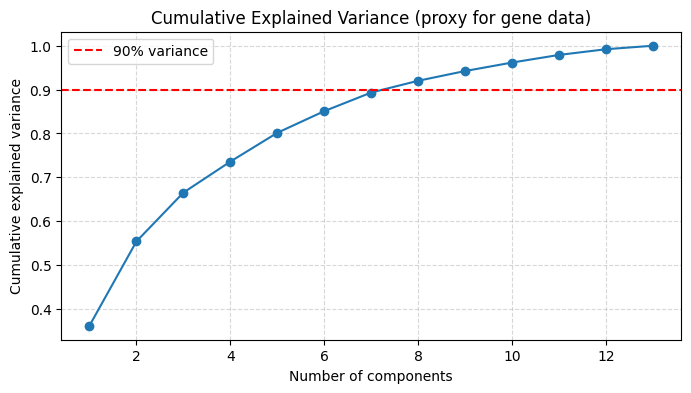

Cross-validated metrics (pipeline: scale->PCA(95%)->KNN):
accuracy: mean=0.9606, std=0.0139
precision_macro: mean=0.9615, std=0.0131
recall_macro: mean=0.9651, std=0.0110
f1_macro: mean=0.9612, std=0.0124
PCA components kept per fold: [np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10)]
Average components kept: 10.0

Justification summary:
- PCA reduces noise and dimensionality, alleviating overfitting risk for small-sample high-dim data.
- Retaining e.g. 90-95% variance offers a principled tradeoff between compression and information retention.
- Use stratified CV and multiple metrics to demonstrate robust performance to stakeholders.
- For biomedical deployment, validate on independent cohorts and provide uncertainty estimates.



In [5]:
"""
10) Strategy for high-dimensional gene expression data:
- Use PCA to reduce dimensionality
- Decide how many components (explained variance or CV)
- Use KNN post-reduction
- Evaluate with stratified CV and multiple metrics
- Justify pipeline
This cell demonstrates the pipeline using the Wine dataset as a proxy.

->
"""
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import matplotlib.pyplot as plt
import numpy as np

data = load_wine()
X, y = data.data, data.target

# Scale then PCA (fit to full data to show scree)
scaler = StandardScaler().fit(X)
X_s = scaler.transform(X)
pca = PCA().fit(X_s)
explained = pca.explained_variance_ratio_

plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(explained)+1), np.cumsum(explained), 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance (proxy for gene data)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.show()

# Pipeline: scale -> PCA(keep 95%) -> KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, svd_solver='full')),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, return_estimator=True, n_jobs=-1)

print("Cross-validated metrics (pipeline: scale->PCA(95%)->KNN):")
for metric in scoring:
    vals = cv_results[f'test_{metric}']
    print(f"{metric}: mean={np.mean(vals):.4f}, std={np.std(vals):.4f}")

# How many components were kept (per fold)
components = [est.named_steps['pca'].n_components_ for est in cv_results['estimator']]
print("PCA components kept per fold:", components)
print("Average components kept:", np.mean(components))

print("""
Justification summary:
- PCA reduces noise and dimensionality, alleviating overfitting risk for small-sample high-dim data.
- Retaining e.g. 90-95% variance offers a principled tradeoff between compression and information retention.
- Use stratified CV and multiple metrics to demonstrate robust performance to stakeholders.
- For biomedical deployment, validate on independent cohorts and provide uncertainty estimates.
""")